In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DqJoNh0yvaZIz0WZ7TiV")
project = rf.workspace("nix-ibdvk").project("cigarette-detection-mgfmv")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


In [3]:
!nvidia-smi

Wed Jun 19 12:04:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 11.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [5]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display

display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


In [6]:
!yolo task=detect mode=train model=/content/drive/MyDrive/runs-copy/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 batch=16 augment=True hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 degrees=0.5 translate=0.1 scale=0.5 shear=0.0 perspective=0.0 flipud=0.0 fliplr=0.5 mosaic=1.0 mixup=0.5 save_period=100

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/runs-copy/detect/train/weights/best.pt, data=/content/Cigarette-detection-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=100, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Cigarette-detection-1/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100% 205/205 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:07<00:00,  1.79it/s]
                   all        205        210      0.977       0.99      0.994      0.902
Speed: 1.7ms preprocess, 22.9ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
import shutil

source_dir = '/content/runs'
destination_dir = '/content/drive/My Drive/runs-copy-2'


shutil.copytree(source_dir, destination_dir)

'/content/drive/My Drive/runs-copy-2'

In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/102 /content/Cigarette-detection-1/test/images/0k0Ok6C7RVMPFs4SkeM0_jpg.rf.7256cdfd88ad8006c087ccb1298804ad.jpg: 640x640 1 cig_butt, 37.1ms
image 2/102 /content/Cigarette-detection-1/test/images/1b16vtgj7qFaGc3ikuMR_jpg.rf.0dc03fb53ea94e8ab1f1e3c43de02eee.jpg: 640x640 1 cig_butt, 37.1ms
image 3/102 /content/Cigarette-detection-1/test/images/1qZQeSecPVwigr9RDZ9d_jpg.rf.a070a5ea98f9b36e3929d889e0ab2fd6.jpg: 640x640 1 cig_butt, 37.1ms
image 4/102 /content/Cigarette-detection-1/test/images/2WunWFRkx3nnDY4VcLWv_jpg.rf.87385da4303c38acfbff0aa2c3c67ea0.jpg: 640x640 1 cig_butt, 37.0ms
image 5/102 /content/Cigarette-detection-1/test/images/4sSqrd4dswNAKIJ69MZ6_jpg.rf.9f164d16486d09d1ad2a7b6c11b81f9b.jpg: 640x640 1 cig_butt, 37.0ms
image 6/102 /content/Cigarette-detection-1/test/images/9Dz5Ds41EJ8M3yVPnWVF_jpg.rf.10f92430

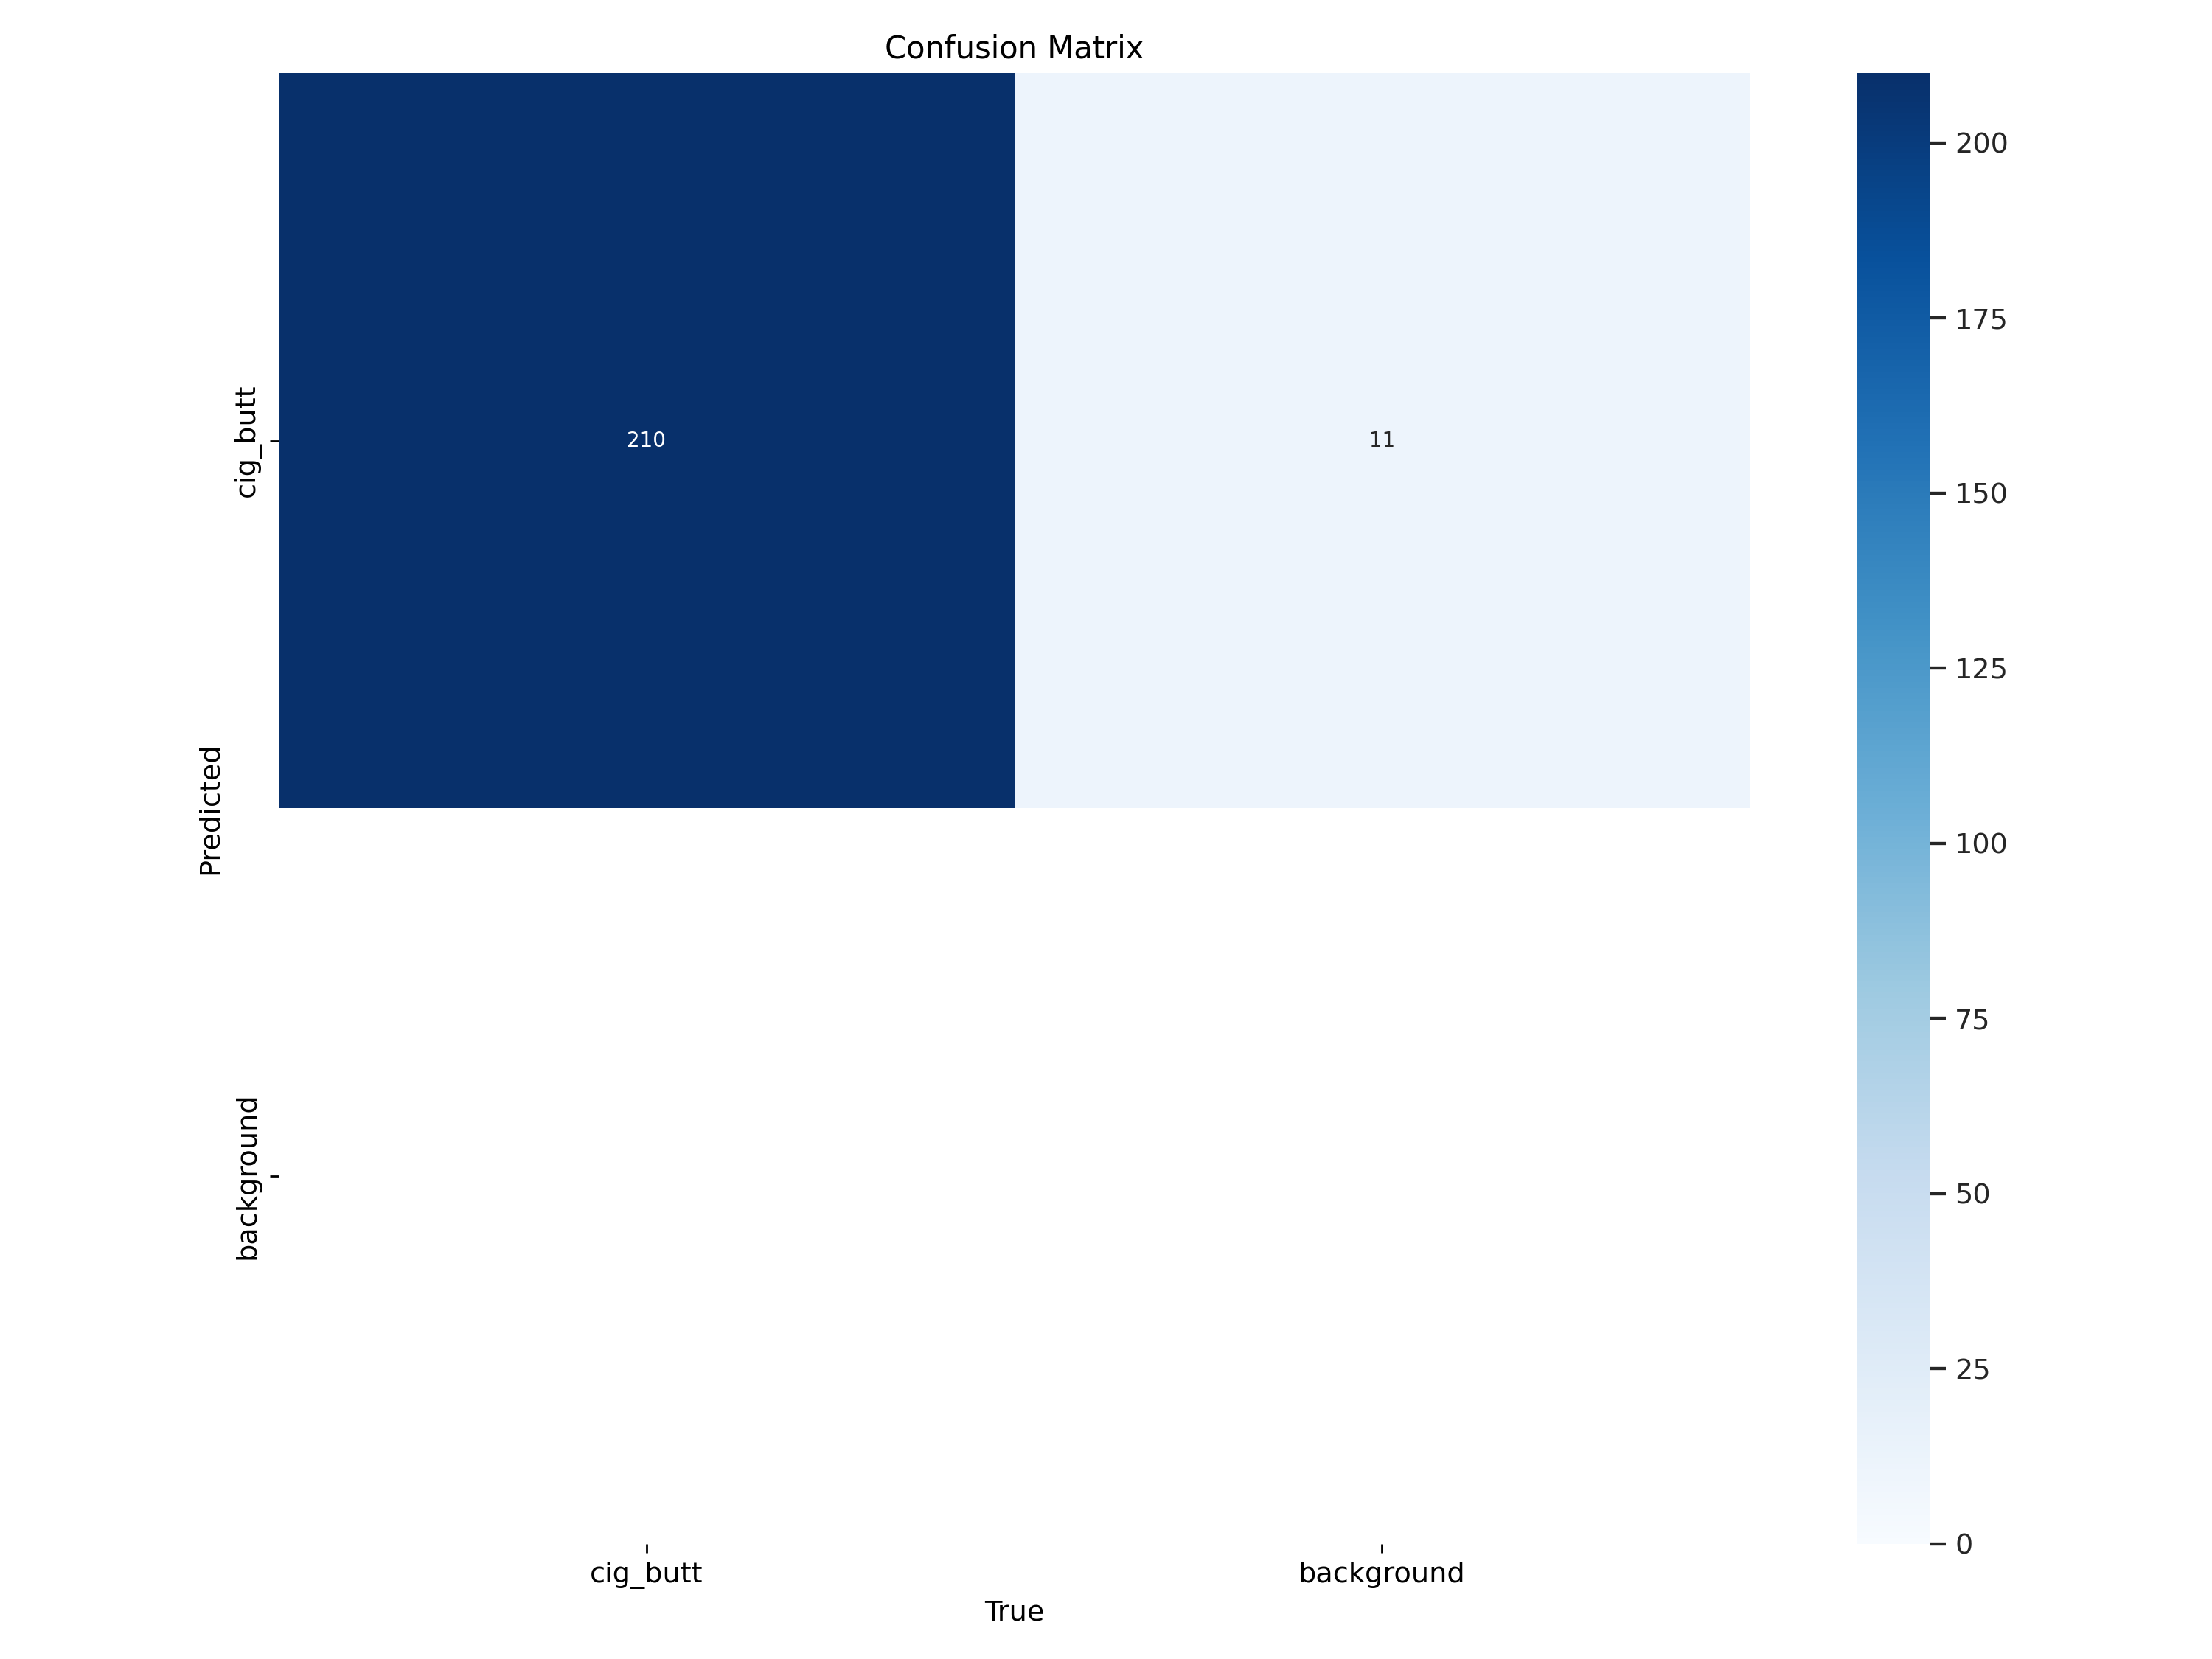

In [10]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=800, height=800)

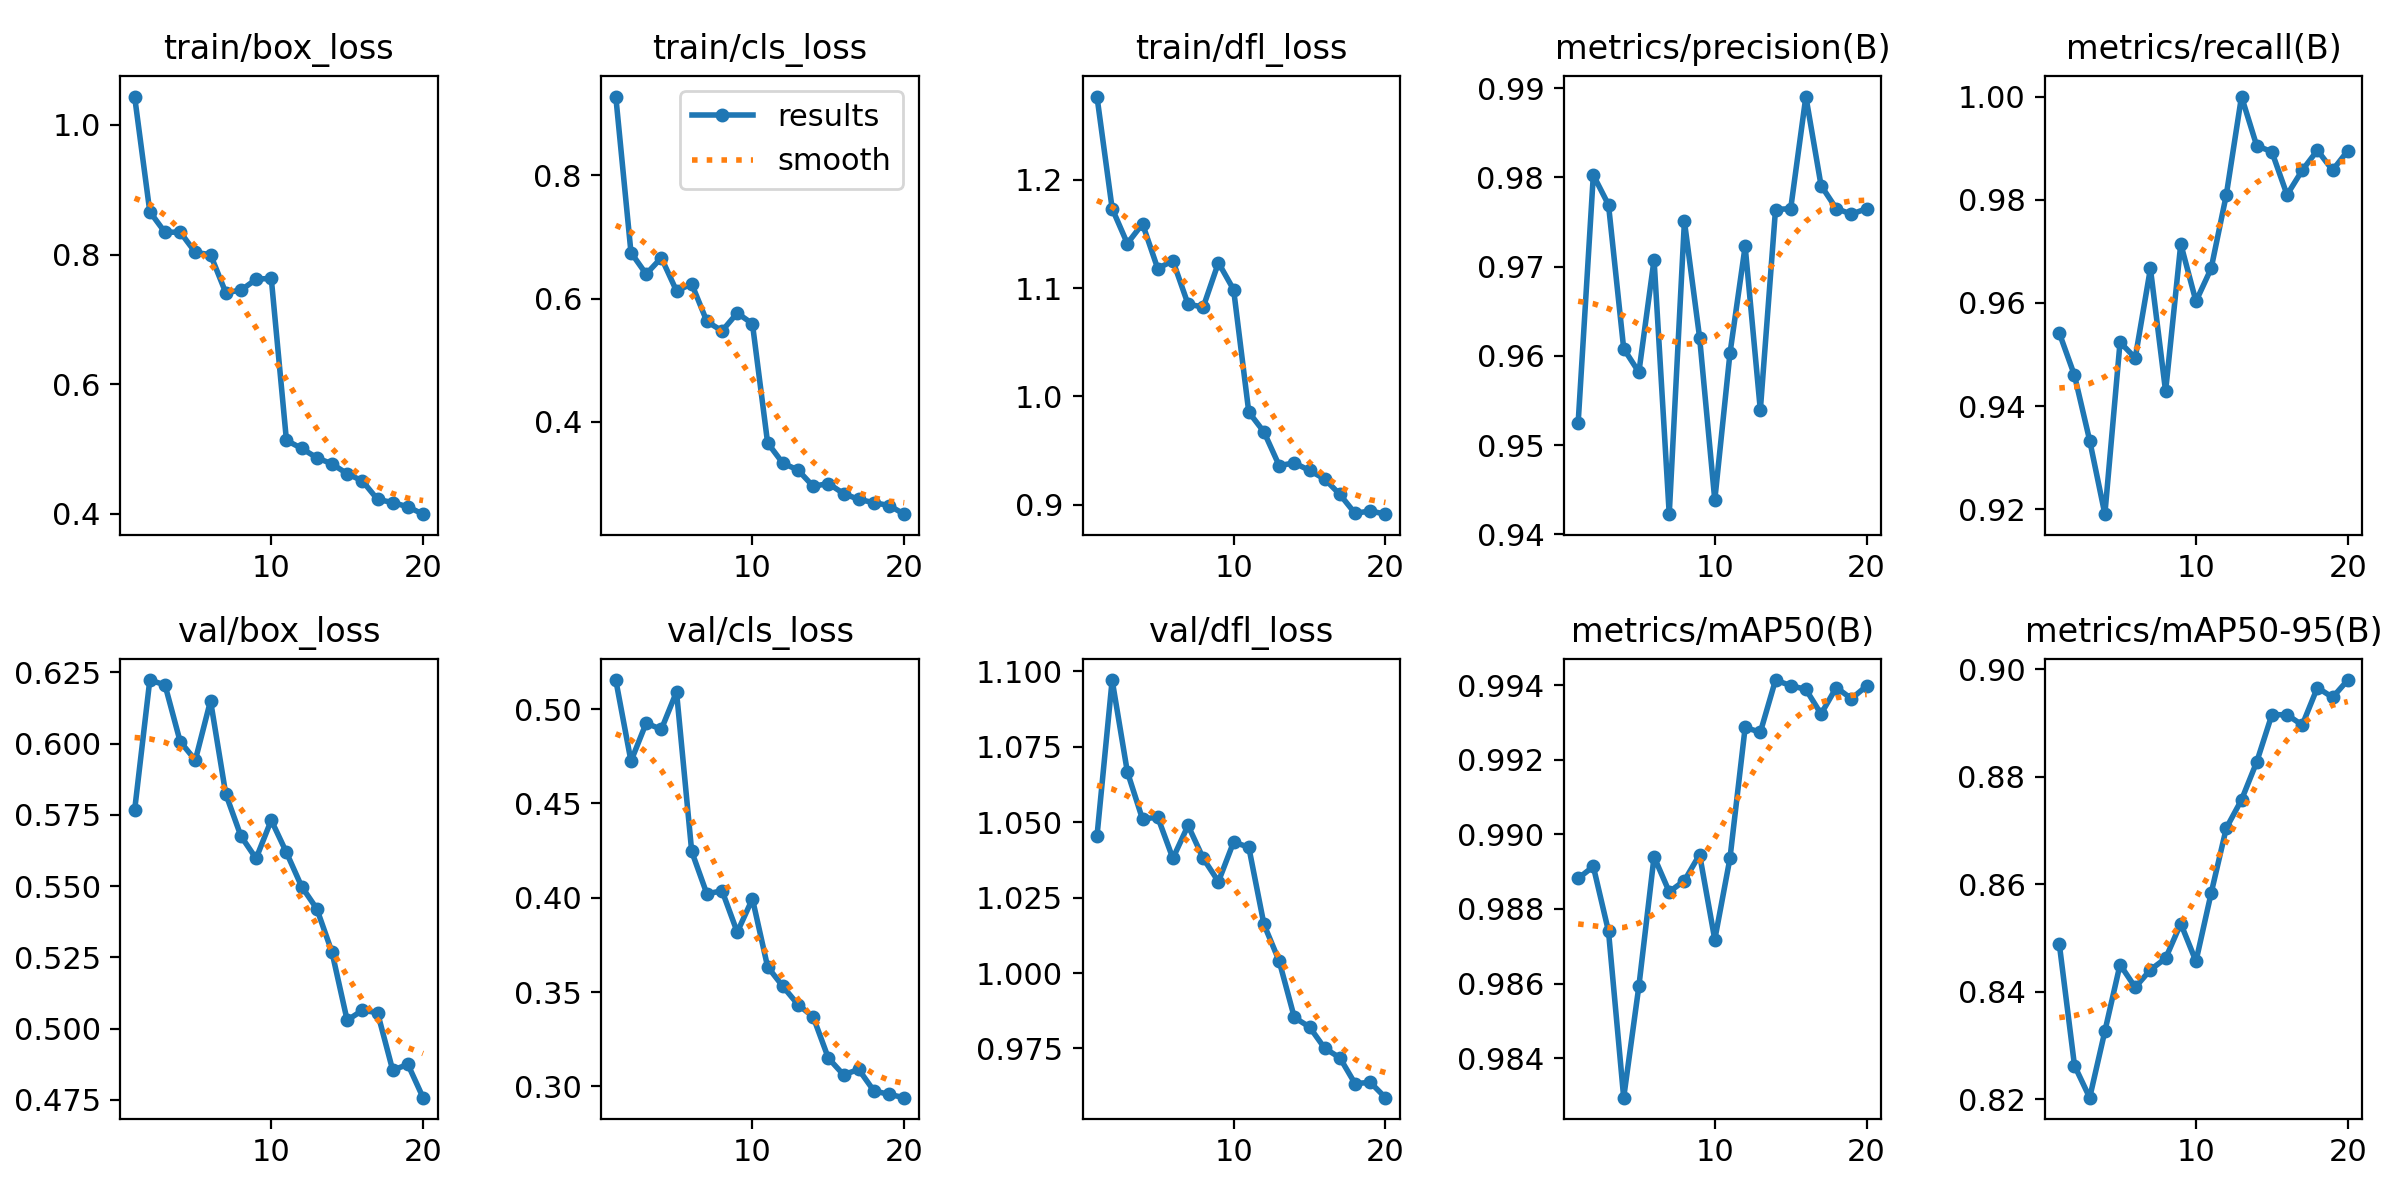

In [11]:
Image(filename=f'/content/runs/detect/train/results.png', width=1600, height=600)

In [12]:
import glob
for image_path in glob.glob('/content/runs/detect/predict/images/*.jpg'):
    display(Image(filename=image_path, width=800, height=800))
    print("\n")